### **LOAD AND SHOW THE DATA**

In [ ]:
# Import dataset from Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library that we need

import zipfile
import os

file_name = '/content/drive/MyDrive/Datasets/brain_tumor_classification_(mri).zip' # Match the path to your file location

with zipfile.ZipFile(file_name, 'r') as zip_ref:
  zip_ref.extractall('/content')

# Show extract file

print(os.listdir('/content'))


['.config', 'Testing', 'Training', 'drive', 'sample_data']


In [ ]:
# Declare variable for files

train_glioma_tumor_dir = os.path.join('/content/Training/glioma_tumor')
train_meningioma_tumor_dir = os.path.join('/content/Training/meningioma_tumor')
train_no_tumor_dir = os.path.join('/content/Training/no_tumor')
train_pituitary_tumor_dir = os.path.join('/content/Training/pituitary_tumor')

validation_glioma_tumor_dir = os.path.join('/content/Testing/glioma_tumor')
validation_meningioma_tumor_dir = os.path.join('/content/Testing/meningioma_tumor')
validation_no_tumor_dir = os.path.join('/content/Testing/no_tumor')
validation_pituitary_tumor_dir = os.path.join('/content/Testing/pituitary_tumor')

In [ ]:
# Access the data

train_glioma_tumor_names = os.listdir(train_glioma_tumor_dir)
print(train_glioma_tumor_names[:10])

train_meningioma_tumor_names = os.listdir(train_meningioma_tumor_dir)
print(train_meningioma_tumor_names[:10])

train_no_tumor_names = os.listdir(train_no_tumor_dir)
print(train_no_tumor_names[:10])

train_pituitary_tumor_names = os.listdir(train_pituitary_tumor_dir)
print(train_pituitary_tumor_names[:10])

['gg (364).jpg', 'gg (130).jpg', 'gg (667).jpg', 'gg (459).jpg', 'gg (11).jpg', 'gg (442).jpg', 'gg (292).jpg', 'gg (507).jpg', 'gg (132).jpg', 'gg (200).jpg']
['m3 (89).jpg', 'm1(26).jpg', 'm3 (241).jpg', 'm1(148).jpg', 'm2 (131).jpg', 'm3 (180).jpg', 'm2 (36).jpg', 'm2 (159).jpg', 'm3 (189).jpg', 'm (143).jpg']
['image(272).jpg', 'image(204).jpg', 'image(308).jpg', 'image(119).jpg', 'image(73).jpg', 'image(324).jpg', 'image(21).jpg', 'image(166).jpg', 'image(200).jpg', 'image(160).jpg']
['p (168).jpg', 'p (609).jpg', 'p (241).jpg', 'p (181).jpg', 'p (138).jpg', 'p (31).jpg', 'p (618).jpg', 'p (309).jpg', 'p (676).jpg', 'p (421).jpg']


In [ ]:
# Calculate the total training data per category

print('total training glioma tumor images:', len(os.listdir(train_glioma_tumor_dir)))
print('total training meningioma tumor images:', len(os.listdir(train_meningioma_tumor_dir)))
print('total training no tumor images:', len(os.listdir(train_no_tumor_dir)))
print('total training pituitary tumor images:', len(os.listdir(train_pituitary_tumor_dir)))

total training glioma tumor images: 826
total training meningioma tumor images: 822
total training no tumor images: 395
total training pituitary tumor images: 827


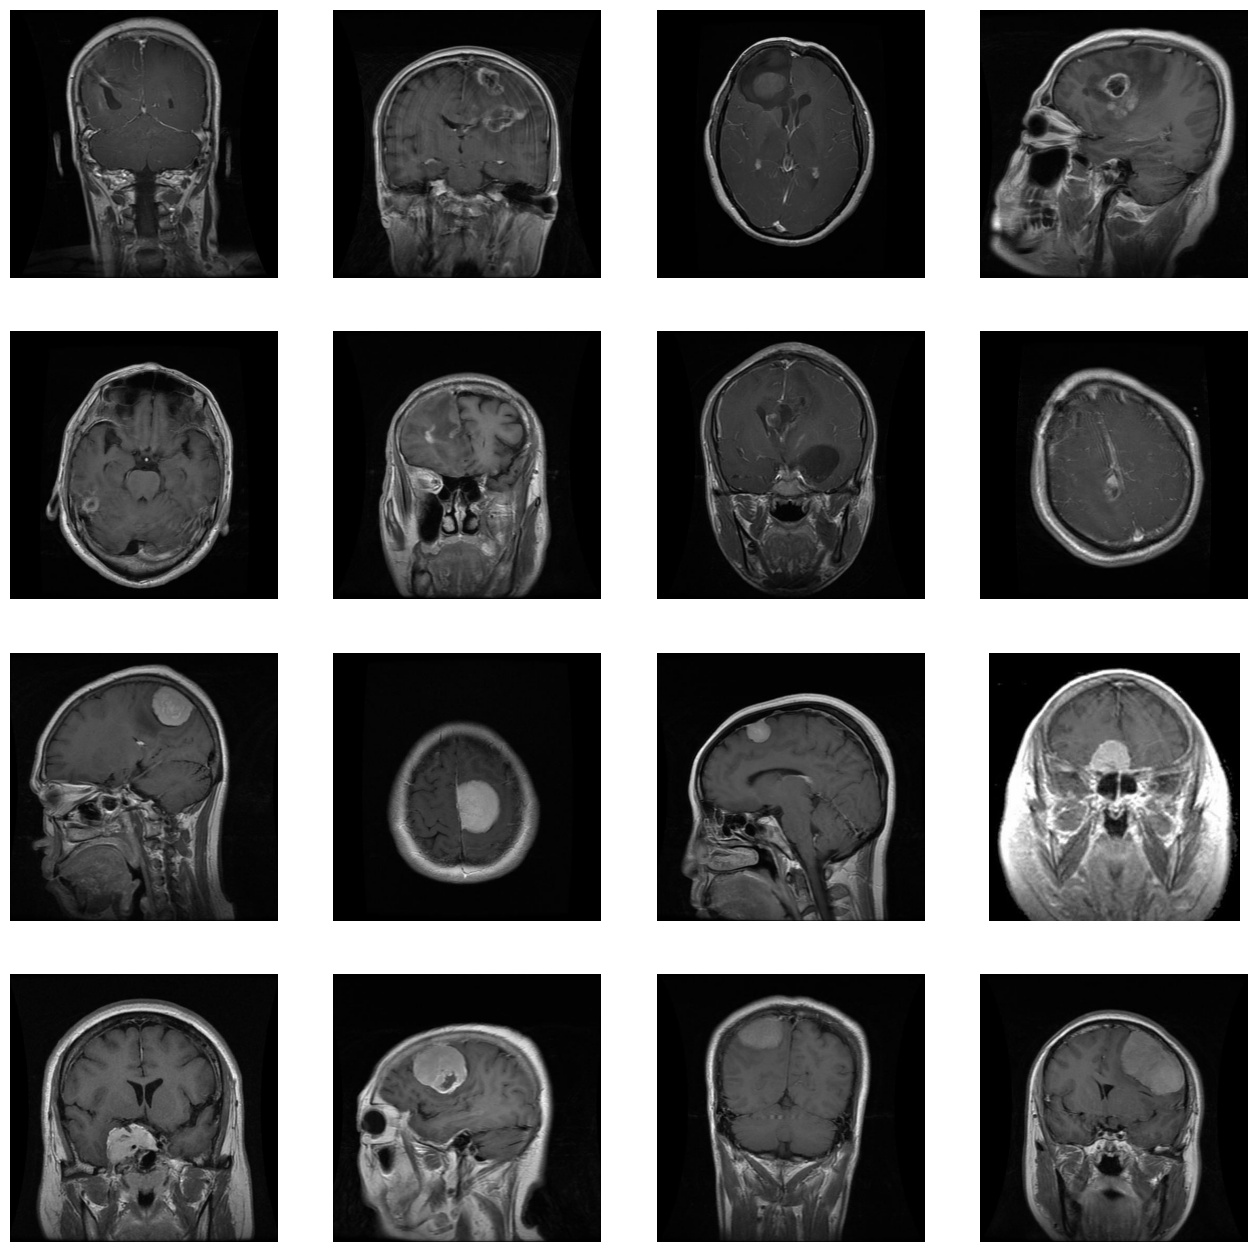

In [ ]:
# Show images from all category

# Import library

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image display configuration

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# Combines all images from different categories

pic_index += 8
next_glioma_tumor_pix = [os.path.join(train_glioma_tumor_dir, fname)
                for fname in train_glioma_tumor_names[pic_index-8:pic_index]]
next_meningioma_tumor_pix = [os.path.join(train_meningioma_tumor_dir, fname)
                for fname in train_meningioma_tumor_names[pic_index-8:pic_index]]
next_no_tumor_pix = [os.path.join(train_no_tumor_dir, fname)
                for fname in train_no_tumor_names[pic_index-8:pic_index]]
next_pituitary_tumor_pix = [os.path.join(train_pituitary_tumor_dir, fname)
                for fname in train_pituitary_tumor_names[pic_index-8:pic_index]]

# Combine all images into one list

all_images = next_glioma_tumor_pix + next_meningioma_tumor_pix + next_no_tumor_pix + next_pituitary_tumor_pix

# Provide constraints according to the grid size

all_images = all_images[:nrows * ncols]

# Show images

for i, img_path in enumerate(all_images):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)


plt.show()

### **CREATE MODELLING**

In [ ]:
# Import libraries that we need

import tensorflow as tf
import cv2
import numpy as np
from tensorflow import keras
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
print(tf.__version__)

2.17.1


In [ ]:
# Create model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax') # Uses 4 output neurons dan 'softmax' activation
])

# Show the summary

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compile the model using 'Adamax' optimizers

from tensorflow.keras.optimizers import Adamax

model.compile(
    loss='categorical_crossentropy', # Use 'categorical crossentropy' for multi-classes
    optimizer='adamax',
    metrics=['accuracy']
)

### **DATA PREPROCESSING**

In [38]:
# Data generator set up

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [39]:
# Preprocess Data

# Training images
train_generator = train_datagen.flow_from_directory(
    '/content/Training',  # training data directory
    target_size=(150, 150),  # changes the resolution of the entire image to 150x150 pixels
    batch_size=20,
    class_mode='categorical'
)

# Test images
test_generator = test_datagen.flow_from_directory(
    '/content/Testing',  # testing dataset directory
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical',
    shuffle=False  # Ensure no shuffling for evaluation
)

# Validation images
validation_generator = test_datagen.flow_from_directory(
    '/content/Testing',  # validation data directory
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [40]:
# Fit model

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=2
)

# Find the epoch with the highest validation accuracy
best_epoch = np.argmax(history.history['val_accuracy'])
print(f"Best epoch: {best_epoch + 1}")
print(f"Validation Accuracy at best epoch: {history.history['val_accuracy'][best_epoch]}")
print(f"Training Accuracy at best epoch: {history.history['accuracy'][best_epoch]}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 - 157s - 1s/step - accuracy: 0.9989 - loss: 0.0025 - val_accuracy: 0.7474 - val_loss: 10.1382
Epoch 2/10
143/143 - 1s - 7ms/step - accuracy: 1.0000 - loss: 9.8549e-05 - val_accuracy: 0.5000 - val_loss: 16.3963


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/10
143/143 - 199s - 1s/step - accuracy: 1.0000 - loss: 4.6099e-05 - val_accuracy: 0.7368 - val_loss: 10.5862
Epoch 4/10
143/143 - 5s - 35ms/step - accuracy: 1.0000 - loss: 1.6425e-05 - val_accuracy: 0.7857 - val_loss: 6.5826
Epoch 5/10
143/143 - 156s - 1s/step - accuracy: 1.0000 - loss: 2.3185e-05 - val_accuracy: 0.7474 - val_loss: 10.1027
Epoch 6/10
143/143 - 5s - 32ms/step - accuracy: 1.0000 - loss: 3.9874e-06 - val_accuracy: 0.6429 - val_loss: 20.4071
Epoch 7/10
143/143 - 156s - 1s/step - accuracy: 1.0000 - loss: 1.7862e-05 - val_accuracy: 0.7447 - val_loss: 10.2368
Epoch 8/10
143/143 - 4s - 28ms/step - accuracy: 1.0000 - loss: 3.9040e-06 - val_accuracy: 0.7143 - val_loss: 16.5318
Epoch 9/10
143/143 - 153s - 1s/step - accuracy: 1.0000 - loss: 1.4693e-05 - val_accuracy: 0.7474 - val_loss: 10.4049
Epoch 10/10
143/143 - 5s - 36ms/step - accuracy: 1.0000 - loss: 1.5096e-05 - val_accuracy: 0.6429 - val_loss: 12.2287
Best epoch: 4
Validation Accuracy at best epoch: 0.7857142686843

In [41]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size,
    verbose=2
)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

19/19 - 7s - 352ms/step - accuracy: 0.7342 - loss: 10.8541
Test Accuracy: 0.7342
Test Loss: 10.8541


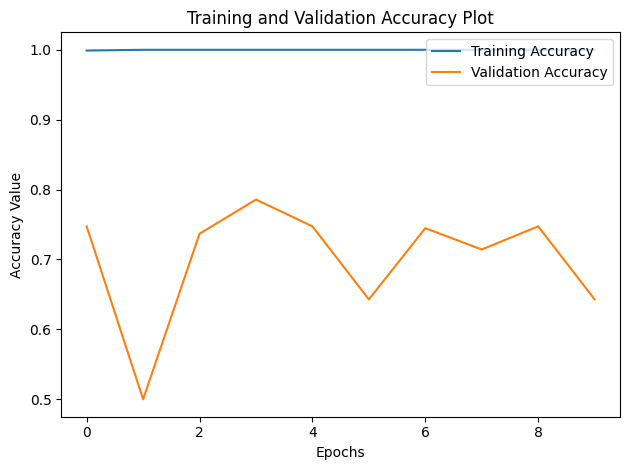

In [42]:
# Plot training and validation accuracy

import matplotlib.pyplot as plt


# Accuracy Plot

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.title('Training and Validation Accuracy Plot')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

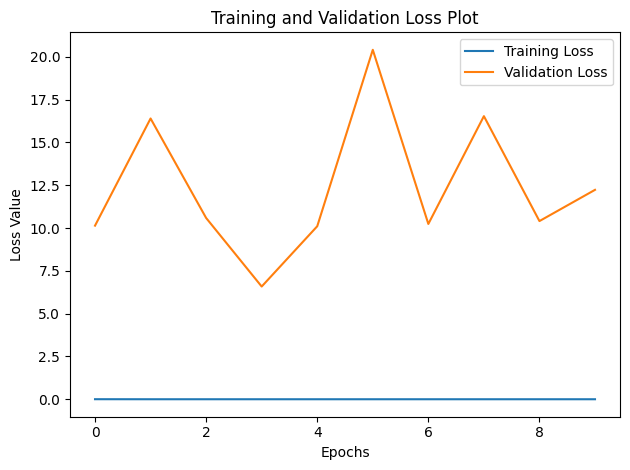

In [43]:
# Loss Plot

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.title('Training and Validation Loss Plot')
plt.legend()

plt.tight_layout()
plt.show()

### **BUILD CLASSIFICATION SYSTEM AND SHOW RESULT ON STREAMLIT**

In [50]:
import joblib
from joblib import dump
from google.colab import files

# Save model using joblib
joblib.dump(model, 'brain_tumor_classification_model.joblib')

# Download model
files.download('brain_tumor_classification_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Check all library versions used for input and save them in the requirements.txt file

# Checking the version of TensorFlow
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# Checking the version of Keras
import keras
print("Keras version:", keras.__version__)

# Checking the version of other packages
import numpy as np
print("NumPy version:", np.__version__)

import pandas as pd
print("Pandas version:", pd.__version__)

import matplotlib
print("Matplotlib version:", matplotlib.__version__)

import seaborn as sns
print("Seaborn version:", sns.__version__)

import sklearn
print("Scikit-learn version:", sklearn.__version__)

import joblib
print("Joblib version:", joblib.__version__)

import scipy
print("SciPy version:", scipy.__version__)

TensorFlow version: 2.17.1
Keras version: 3.5.0
NumPy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.8.0
Seaborn version: 0.13.2
Scikit-learn version: 1.5.2
Joblib version: 1.4.2
SciPy version: 1.13.1
